# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
center = pd.read_csv('/content/drive/MyDrive/DS with Python/Project/dataset/fulfilment_center_info.csv')

In [ ]:
meal=pd.read_csv('/content/drive/MyDrive/DS with Python/Project/dataset/meal_info.csv')

In [ ]:
#initial training set
itrain= pd.read_csv('/content/drive/MyDrive/DS with Python/Project/dataset/train.csv')
# initial test set
itest = pd.read_csv('/content/drive/MyDrive/DS with Python/Project/dataset/test.csv')

In [ ]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [ ]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
itrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [ ]:
  itest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [ ]:
# combining all dataframes
temp = itrain.merge(center, how = 'left', on = 'center_id')
train= temp.merge(meal, how = 'left', on = 'meal_id')

temp = itest.merge(center, how = 'left', on = 'center_id')
test= temp.merge(meal, how = 'left', on = 'meal_id')



# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [ ]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


In [ ]:
# converting data types:
x = ['center_id','meal_id','category','cuisine','city_code','region_code','center_type']
train[x] = train[x].astype('category')
test[x] = test[x].astype('category')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     456548 non-null  int64   
 1   week                   456548 non-null  int64   
 2   center_id              456548 non-null  category
 3   meal_id                456548 non-null  category
 4   checkout_price         456548 non-null  float64 
 5   base_price             456548 non-null  float64 
 6   emailer_for_promotion  456548 non-null  int64   
 7   homepage_featured      456548 non-null  int64   
 8   num_orders             456548 non-null  int64   
 9   city_code              456548 non-null  category
 10  region_code            456548 non-null  category
 11  center_type            456548 non-null  category
 12  op_area                456548 non-null  float64 
 13  category               456548 non-null  category
 14  cuisine             

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     32573 non-null  int64   
 1   week                   32573 non-null  int64   
 2   center_id              32573 non-null  category
 3   meal_id                32573 non-null  category
 4   checkout_price         32573 non-null  float64 
 5   base_price             32573 non-null  float64 
 6   emailer_for_promotion  32573 non-null  int64   
 7   homepage_featured      32573 non-null  int64   
 8   city_code              32573 non-null  category
 9   region_code            32573 non-null  category
 10  center_type            32573 non-null  category
 11  op_area                32573 non-null  float64 
 12  category               32573 non-null  category
 13  cuisine                32573 non-null  category
dtypes: category(7), float64(3), int64(4)
m

In [ ]:
#checking null values
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [ ]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

No null values

In [ ]:
train.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [ ]:
train.describe()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760,4.083590
std,1.443548e+05,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798,1.091686
min,1.000000e+06,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000,0.900000
25%,1.124999e+06,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000,3.600000
50%,1.250184e+06,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000,4.000000
75%,1.375140e+06,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000,4.500000
max,1.499999e+06,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,7.000000


## Feature engineering

In [ ]:
#dicount calculation. Since the base price is more than checkout price, there are discounts provided in some cases.
train['discount'] = (train.base_price - train.checkout_price)/train.base_price*100
test['discount'] = (test.base_price - test.checkout_price)/test.base_price*100


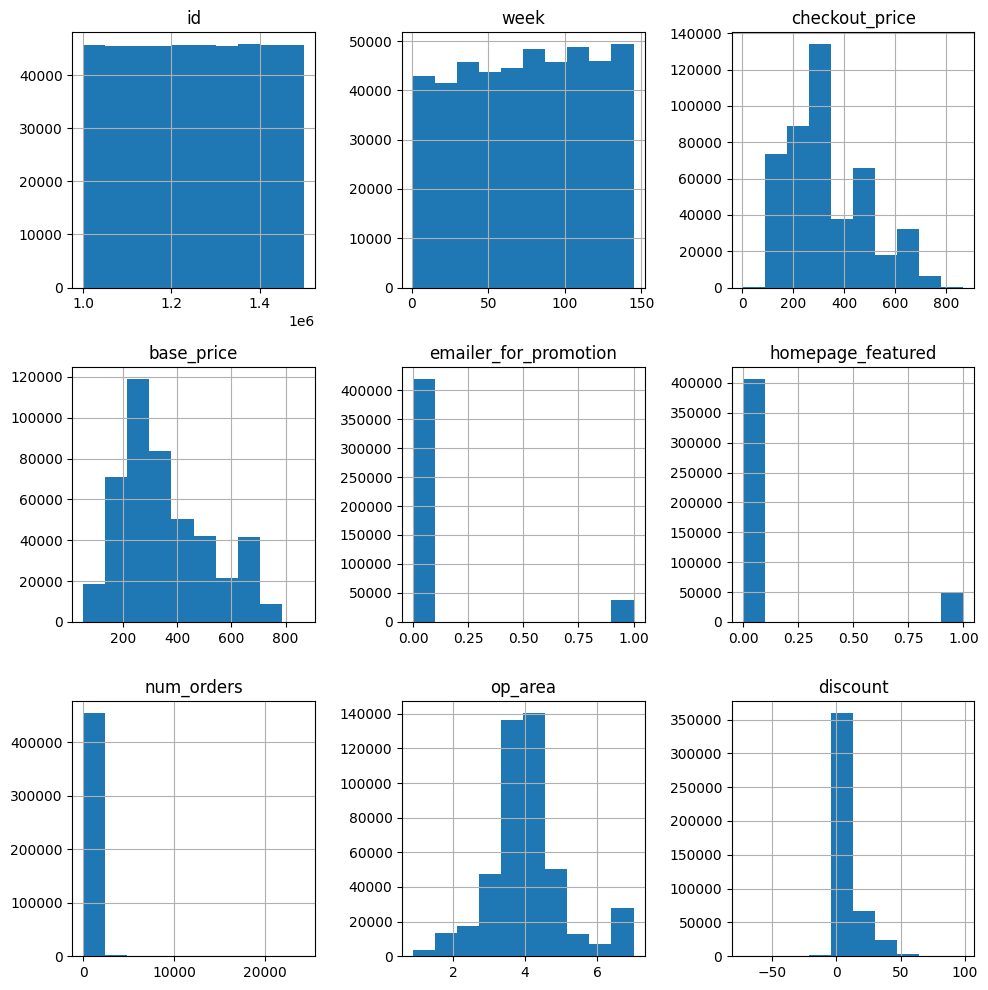

In [ ]:
train.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

In [ ]:
fig = px.sunburst(train, path=["center_type","region_code","city_code"], values='num_orders')
fig.show()

In [ ]:
week_orders=train.groupby(["week"],as_index=False).sum()
week_orders=week_orders[["week","num_orders"]]

fig = px.line(week_orders, x="week", y="num_orders",
              markers=True,title="Order weekly trend")
fig.show()

<ipython-input-98-c66ebc256bcf>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



No trend and seasonality in this series

## Variable importance

<ipython-input-99-a01aa47016cc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



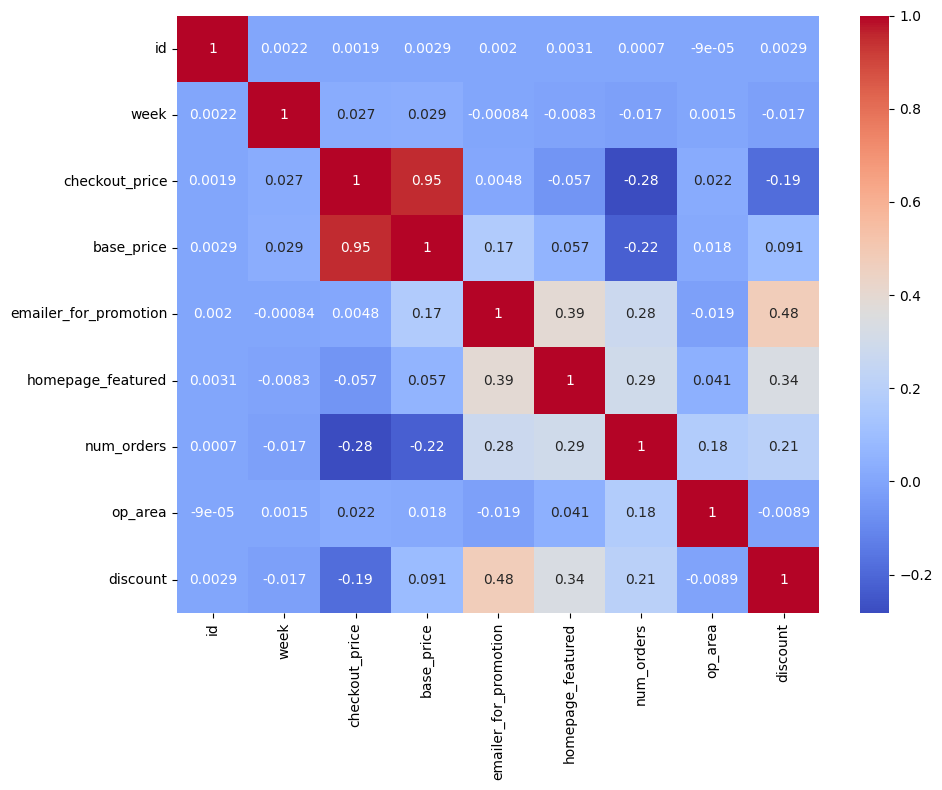

In [ ]:
#checking correlation
plt.figure(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            xticklabels= corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm', annot = True
            )
plt.tight_layout()
plt.show()

In [ ]:

# Sortting features by correlation coefficient with the target variable
corr['num_orders'].sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.294490
emailer_for_promotion    0.277147
discount                 0.205188
op_area                  0.176976
id                       0.000702
week                    -0.017210
base_price              -0.222306
checkout_price          -0.282108
Name: num_orders, dtype: float64

1. Checkout_price and base_price have postive correlation. They are directly proportional to each other and one of them can be removed from the analysis. Base_price will be removed as it has less correlation wrt target variable
2. Id removed from analysis as it is only a series of numbers generated to differentiate distinct rows
3. The variables that can act as best predictors are : 

  homepage_featured

  emailer_for_promotion
  
  checkout_price


## Outlier Analysis

In [ ]:
#outlier analysis
for col in train.select_dtypes(include='number').columns:
  Q1 = train[col].quantile(0.1)
  Q3 = train[col].quantile(0.9)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  print(col,'\t','Lower Limit','\t', lower_bound)
  upper_bound = Q3 + 3 * IQR
  print(col,'\t','Upper Limit','\t', upper_bound)
  LB_outliers = train[col][(train[col] < lower_bound)]
  print(col,'\t' +'LB count'+'\t',LB_outliers.count())
  UB_outliers = train[col][(train[col] > upper_bound)]
  print(col,'\t' +'UB count'+'\t',UB_outliers.count())


id 	 Lower Limit 	 -150488.10000000033
id 	 Upper Limit 	 2650531.1000000006
id 	LB count	 0
id 	UB count	 0
week 	 Lower Limit 	 -332.0
week 	 Upper Limit 	 480.0
week 	LB count	 0
week 	UB count	 0
checkout_price 	 Lower Limit 	 -1137.5699999999997
checkout_price 	 Upper Limit 	 1869.9799999999998
checkout_price 	LB count	 0
checkout_price 	UB count	 0
base_price 	 Lower Limit 	 -1270.55
base_price 	 Upper Limit 	 2056.34
base_price 	LB count	 0
base_price 	UB count	 0
emailer_for_promotion 	 Lower Limit 	 0.0
emailer_for_promotion 	 Upper Limit 	 0.0
emailer_for_promotion 	LB count	 0
emailer_for_promotion 	UB count	 37050
homepage_featured 	 Lower Limit 	 -3.0
homepage_featured 	 Upper Limit 	 4.0
homepage_featured 	LB count	 0
homepage_featured 	UB count	 0
num_orders 	 Lower Limit 	 -1723.0
num_orders 	 Upper Limit 	 2358.0
num_orders 	LB count	 0
num_orders 	UB count	 2249
op_area 	 Lower Limit 	 -4.7
op_area 	 Upper Limit 	 12.8
op_area 	LB count	 0
op_area 	UB count	 0
discoun

<Axes: >

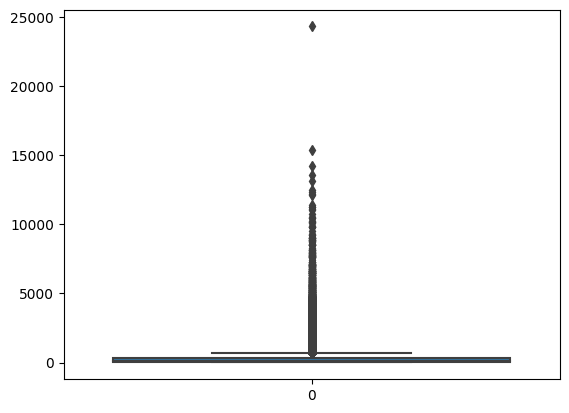

In [ ]:
sns.boxplot(train['num_orders'])

In [ ]:
# removing outliers in target variable:
train = train[train['num_orders'] <= 2358]

# Data prep for model

In [ ]:
train1 = train.copy()

In [ ]:
def one_hot_encode(features_to_encode, dataset):
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(dataset[features_to_encode])

    encoded_cols = pd.DataFrame(encoder.transform(dataset[features_to_encode]),columns=encoder.get_feature_names_out())
    dataset = dataset.drop(columns=features_to_encode)
    for cols in encoded_cols.columns:
      dataset[cols] = encoded_cols[cols]
    return dataset

In [ ]:
# making a list of all categorical variables
alist = train1.select_dtypes(include='category').columns.values.tolist()

features_to_encode = alist
data = one_hot_encode(features_to_encode, train1)
data = data.reset_index(drop = True)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

<ipython-input-30-ef70eb028b29>:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-30-ef70eb028b29>:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-30-ef70eb028b29>:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of

In [ ]:
data

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,discount,center_id_10,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,177,2.0,10.151684,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1466964,1,136.83,135.83,0,0,270,2.0,-0.736214,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1346989,1,134.86,135.86,0,0,189,2.0,0.736052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1338232,1,339.50,437.53,0,0,54,2.0,22.405321,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1448490,1,243.50,242.50,0,0,40,2.0,-0.412371,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454294,1271326,145,484.09,484.09,0,0,68,4.5,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454295,1062036,145,482.09,482.09,0,0,42,4.5,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454296,1110849,145,237.68,321.07,0,0,501,4.5,25.972529,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454297,1147725,145,243.50,313.34,0,0,729,4.5,22.288887,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Test partition prep
OH_test = one_hot_encode(features_to_encode, test)
test_final= OH_test.drop(["id","base_price"],axis = 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

<ipython-input-30-ef70eb028b29>:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-30-ef70eb028b29>:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-30-ef70eb028b29>:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Train-Validation Data Split
y = data[["num_orders"]]
X= data.drop(["num_orders","id","base_price"],axis = 1)
X= X.replace((np.inf, -np.inf, np.nan), 0) # replace nan and infity values with 0

# 20% of train data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)

In [ ]:
#@title
# #create pipeline for scaling and modeling

# LR_pipe = make_pipeline(StandardScaler(),LinearRegression())
# LR_pipe.fit(X_train, y_train)
# LR_y_pred = LR_pipe.predict(X_val)

In [ ]:
LR_model =LinearRegression()
LR_model.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_val)

In [ ]:
print("R2 score  :",r2_score(y_val, LR_y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, LR_y_pred)))
print('MAPE:',mean_absolute_percentage_error(y_val,LR_y_pred))

R2 score  : 0.23895158854221688
RMSE:  263.29205490579176
MAPE: 2.2604185242581103


# Cross validation in Linear Regression

In [ ]:

y1 = data[["num_orders"]]
X1 = data.drop(["num_orders","id","base_price"], axis=1)
X1= X1.replace((np.inf, -np.inf, np.nan), 0)

skf = StratifiedKFold(n_splits=10)

for fold, (tr, te) in enumerate(skf.split(X1, y1)):    
  X_train1, X_test1 = X1.iloc[tr], X1.iloc[te]
  y_train1, y_test1 = y1.iloc[tr], y1.iloc[te]
  
  LR_model1 =LinearRegression()
  LR_model1.fit(X_train1, y_train1)
  LR_y_pred1 = LR_model1.predict(X_test1)
    
  # results
  print("Fold " ,fold+1)
  print("R2 score  :",r2_score(y_test1, LR_y_pred1))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test1, LR_y_pred1)))
  print('MAPE:',mean_absolute_percentage_error(y_test1,LR_y_pred1))



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.



Fold  1
R2 score  : 0.24998222231716538
RMSE:  261.86762068546574
MAPE: 2.352206361315722
Fold  2
R2 score  : 0.23836790650925266
RMSE:  263.84840600393767
MAPE: 2.2828020777827267
Fold  3
R2 score  : 0.21096762865089036
RMSE:  268.31053364563036
MAPE: 2.380064591102784
Fold  4
R2 score  : 0.24125611990743012
RMSE:  262.682161488977
MAPE: 2.32303002373692
Fold  5
R2 score  : 0.2481435001257113
RMSE:  261.7356474055531
MAPE: 2.1700401536828804
Fold  6
R2 score  : 0.2458772769997768
RMSE:  262.4798630001114
MAPE: 2.1471560459763563
Fold  7
R2 score  : 0.251454357670558
RMSE:  261.8694976200937
MAPE: 2.2409721939235756
Fold  8
R2 score  : 0.22215601523535233
RMSE:  266.86627839482446
MAPE: 2.3196572540377063
Fold  9
R2 score  : 0.23299242338963766
RMSE:  265.092426456102
MAPE: 2.2785898640311064
Fold  10
R2 score  : -6.466882661313474e+16
RMSE:  77003599271.58328
MAPE: 287254096.2937008


# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTmodel = DecisionTreeRegressor(max_depth=30, min_samples_leaf=20,random_state=0)
DTmodel.fit(X_train,y_train)
DT_y_pred = DTmodel.predict(X_val)

In [ ]:
print("R2 score  :",r2_score(y_val, DT_y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, DT_y_pred)))
print('MAPE:',mean_absolute_percentage_error(y_val,DT_y_pred))

R2 score  : 0.5668513015477752
RMSE:  198.63241325253952
MAPE: 1.085161440212128


In [ ]:
importances = DTmodel.feature_importances_

# sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]
df_importances = []
# print feature importances
print("Feature ranking:")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {importances[idx]}")
    df_importances.append(importances[idx])
  
df_importances = df_importances.sort_values('importance', ascending=False)


Feature ranking:
checkout_price: 0.4103227045558262
op_area: 0.15982007646111654
discount: 0.1346759718965282
week: 0.12225188590736608
homepage_featured: 0.11609944397302449
emailer_for_promotion: 0.039988391318703936
center_type_TYPE_A: 0.00277588041461238
region_code_56: 0.0022391475205298756
category_Beverages: 0.0013975536607001213
region_code_34: 0.0012232871752869009
region_code_77: 0.0011125314368757272
center_type_TYPE_B: 0.0007680771970384363
cuisine_Thai: 0.0006908681942475394
cuisine_Italian: 0.0006864631935162905
cuisine_Continental: 0.0006702593668813657
cuisine_Indian: 0.0006306854253358761
center_type_TYPE_C: 0.0004769674789055722
city_code_590: 0.00046225304987957967
city_code_526: 0.0004101556720290852
center_id_104: 0.0002551792939754512
center_id_174: 0.00023480874879312706
city_code_649: 0.0002257950154707226
category_Desert: 0.0002000100896773581
city_code_699: 0.00016700637598866263
city_code_604: 0.0001420562067732868
city_code_638: 0.00012582486762499726
region

AttributeError: ignored

# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFRmodel = RandomForestRegressor(max_depth=7,random_state=0)
RFRmodel.fit(X_train,y_train)
RF_y_pred = RFRmodel.predict(X_val)

<ipython-input-44-834688f71263>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
print("R2 score  :",r2_score(y_val, RF_y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, RF_y_pred)))
print('MAPE:',mean_absolute_percentage_error(y_val,RF_y_pred))

R2 score  : 0.384724505982707
RMSE:  236.73715330745367
MAPE: 1.8306956618583725


#Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
GB_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10,
                                     random_state=0, loss='absolute_error')
GB_model.fit(X_train, y_train)
GB_y_pred = GB_model.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print("R2 score  :",r2_score(y_val, GB_y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, GB_y_pred)))
print('MAPE:',mean_absolute_percentage_error(y_val,GB_y_pred))

R2 score  : 0.5564507438331151
RMSE:  201.0030001880363
MAPE: 0.8504292447970252


# Orders Prediction
Model Selected: Decision Tree 

Factors: Higher $R^2$ score and lower RMSE value



In [ ]:
test_pred = DTmodel.predict(test_final)
prediction = pd.DataFrame({'id': OH_test['id'], 'predicted_orders': np.round(test_pred,0)})

In [ ]:
prediction.to_csv('/content/drive/MyDrive/DS with Python/Project/Prediction.csv')

# workspace

## Support Vector Machine Model

In [ ]:
# from sklearn.svm import SVC

# svm_model = SVC(kernel='linear', C=100.0, random_state=0)
# svm_model.fit(X_train, y_train)
# svm_y_pred = svm_model.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# print("R2 score  :",r2_score(y_val, svm_y_pred))
# print("MSE score  :",mean_squared_error(y_val, svm_y_pred))
# print("RMSE: ", np.sqrt(mean_squared_error(y_val, svm_y_pred)))
# print('MAPE:',mean_absolute_percentage_error(y_val,svm_y_pred))

In [ ]:
# encoded_data = pd.DataFrame(encoded_data)
# train1 = train1.drop([['center_id', 'meal_id', 'city_code', 'region_code', 'center_type','category', 'cuisine']])
# pd.concat(train1, encoded_data)

In [ ]:
#converting categorical variables into dummy variables
# df_dummies = pd.get_dummies(df[['category','cuisine']])

In [ ]:
#dropping categorical columns and adding the dummies
# df.drop(['category','cuisine'],axis = 1, inplace = True)
# df = pd.concat([df,df_dummies],axis = 1)

In [ ]:
# pd.plotting.scatter_matrix(df, diagonal = 'kde', figsize= (10,10))
# plt.tight_layout()
# plt.show()

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split

In [ ]:
# X = train.drop(['num_orders','center_type','cuisine','category'], axis=1)
# Y = train['num_orders']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# X

In [ ]:
# regr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
#                                  max_depth=5000, random_state=0,
#                                  loss='absolute_error', verbose=1
#                                  ).fit(X_train, y_train.values.ravel())
# prediction = regr.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_log_error

In [ ]:
# rmse = 100*np.sqrt(mean_squared_log_error(y_test, prediction))

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [ ]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
meal_info = pd.read_csv('meal_info.csv')
fulfilment_center_info = pd.read_csv('fulfilment_center_info.csv')

In [ ]:
# Check for missing values in each dataset
print(train.isnull().sum())
print(test.isnull().sum())
print(meal_info.isnull().sum())
print(fulfilment_center_info.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64
meal_id     0
category    0
cuisine     0
dtype: int64
center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64


In [ ]:
# Merge datasets
train = pd.merge(train, meal_info, on='meal_id')
train = pd.merge(train, fulfilment_center_info, on='center_id')
test = pd.merge(test, meal_info, on='meal_id')
test = pd.merge(test, fulfilment_center_info, on='center_id')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
# Encode categorical variables 
le = LabelEncoder()
train['category'] = le.fit_transform(train['category'])
train['cuisine'] = le.fit_transform(train['cuisine'])
train['city_code'] = le.fit_transform(train['city_code'])
train['region_code'] = le.fit_transform(train['region_code'])
train['center_type'] = le.fit_transform(train['center_type'])

test['category'] = le.fit_transform(test['category'])
test['cuisine'] = le.fit_transform(test['cuisine'])
test['city_code'] = le.fit_transform(test['city_code'])
test['region_code'] = le.fit_transform(test['region_code'])
test['center_type'] = le.fit_transform(test['center_type'])
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,30,3,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,30,3,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,30,3,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,30,3,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,30,3,2,2.0


In [ ]:
#Normalize numerical variables
scaler = MinMaxScaler()
train[['checkout_price', 'base_price', 'op_area']] = scaler.fit_transform(train[['checkout_price', 'base_price', 'op_area']])
test[['checkout_price', 'base_price', 'op_area']] = scaler.transform(test[['checkout_price', 'base_price', 'op_area']])


In [ ]:
# Split data into features and target variable
X_train = train.drop(['id', 'num_orders'], axis=1)
y_train = train['num_orders']

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Train decision tree model
dt = DecisionTreeRegressor(max_depth=30, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=10)

In [ ]:
# Make predictions for test data
X_Train = train.drop(['id','num_orders'], axis=1)
y_pred = dt.predict(X_Train)


In [ ]:
# Save predictions to submission file
submission = pd.DataFrame({'id': train['id'], 'num_orders': y_pred})


from google.colab import files
submission.to_csv('submission2.csv', encoding = 'utf-8-sig') 
# files.download('submission2.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the submission.csv and train.csv files
submission_df = pd.read_csv("submission2.csv", index_col=0)
train_df = pd.read_csv("train.csv")

In [ ]:
# Merge submission_df and train_df based on the 'id' column
merged_df = submission_df.merge(train_df[['id', 'num_orders']], on='id', suffixes=('_predicted', '_actual'))
x = np.linspace(0,1,100)
y1 = merged_df['num_orders_predicted'].iloc[0:100]
y2 = merged_df['num_orders_actual'].iloc[0:100]
print(merged_df.head())

        id  num_orders_predicted  num_orders_actual
0  1379560            198.000000                177
1  1018704            218.777778                323
2  1196273            171.857143                 96
3  1116527            171.857143                163
4  1343872            198.000000                215


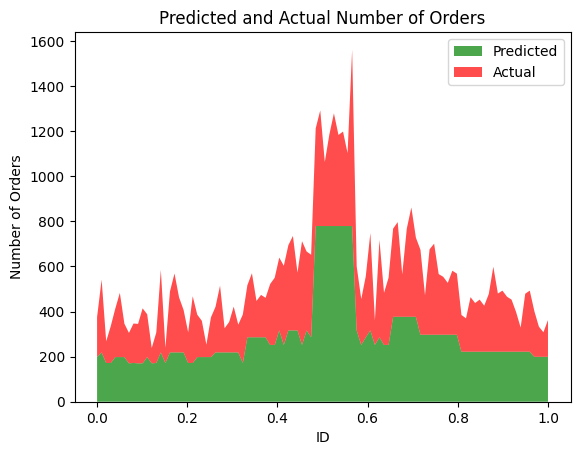

In [ ]:
plt.stackplot(x,[y1, y2], labels=["Predicted","Actual"],colors=['g','r'], alpha=0.7)
plt.xlabel("ID")
plt.ylabel("Number of Orders")
plt.title("Predicted and Actual Number of Orders")
plt.legend()
plt.show()

In [ ]:
print('CV RMSE: ', rmse_scores.mean())
tot = merged_df['num_orders_actual'].mean()
print("RMSE Percent = ",(rmse_scores.mean()/tot)*100)

CV RMSE:  140.1105937484175
RMSE Percent =  53.50330960428994


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2 = r2_score(merged_df['num_orders_actual'], merged_df['num_orders_predicted'])
print("R2 score:", r2)

R2 score: 0.8573429743974005
